# Importar Bibliotecas

In [1]:
# Mudar diretório para chamar scripts com funções
import os
os.chdir('/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py')

# Importar funções e flags definidas em flags.py e functions.py
from functions import *
from flags import * 

import psycopg2
from psycopg2 import OperationalError
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import HTML
import webbrowser
from collections import defaultdict

# Ligação à base de dados

In [2]:
conn = psycopg2.connect(
    host = "contratos-base-gov1.cf87yxnqgph8.eu-central-1.rds.amazonaws.com",
    port = 5432,
    #database = "contratosbasegov",
    user = "contratosbasegov",
    password = "8n9nyeTBFUyCcLJShNrZdPUai2KQkue4")

cur = conn.cursor()

In [3]:
cur.execute('''ROLLBACK;''')

In [3]:
# Filtrar contratos : concursos públicos com CPV's começados por 72
# É preciso colocá-los por ordem crescente para bater certo
cpub = (cpv('72', 'Concurso público'))

In [4]:
# Conjuntos de contratos públicos celebrados no ramo de consultoria IT 
cp = contratos(cpub)

In [5]:
cp = cp.rename(columns={0:'ID', 1:'NrAnuncio', 2:'PrecoBase', 18:'PrecoContratual'})
h(cp.head(2))

ID,NrAnuncio,PrecoBase,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,PrecoContratual,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
10323405,15555/2023,137670.00,6,False,6699898,13437191,2023-09-19,182,2,False,False,https://dre.pt/application/file/221829278,Anúncio de procedimento,Concurso público,Contratualização de uma Plataforma Educacional de Aprendizagem Digital,2023-11-02,2023-10-31,113524.80,332,Município de Santarém (505941350)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=1785),"Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos","Porto Editora, S.A. (500221103)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=585)",None,https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=356587,https://www.acingov.pt/acingovprod/2/zonaPublica/zona_publica_c/donwloadProcedurePiece/NjgwNTc4,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2071168&ext=.pdf,false,72212190-7,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços de desenvolvimento de software para ensino,Principal,113524.8,Contratualização de uma Plataforma Educacional de Aprendizagem Digital,Não aplicável,None,"Portugal, Santarém, Santarém",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1699382733
10322139,13241/2023,592500.00,36,False,6640568,13311154,2023-08-04,151,2,False,False,https://dre.pt/application/file/216770781,Anúncio de procedimento,Concurso público,"Concurso Público, com Publicidade Internacional, para a Aquisição de Serviços de instalação e manutenção de uma infraestrutura tecnológica em ""cloud"" de suporte ao sistema de informação aplicacional Oracle da LIPOR",2023-11-02,2023-11-02,521150.00,547,Associação de Municípios para a Gestão Sustentável de Resíduos do Grande Porto - LIPOR (501394192)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=390),"Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","OPTIMIZER – SERVIÇOS E CONSULTADORIA INFORMÁTICA, LDA. (504775936)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=10540)",None,https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=353643,https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2501553,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2070929&ext=.pdf,false,72300000-8,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços relacionados com dados,Principal,521150.0,"Concurso Público, com Publicidade Internacional, para a Aquisição de Serviços de instalação e manutenção de uma infraestrutura tecnológica em ""cloud"" de suporte ao sistema de informação aplicacional Oracle da LIPOR",Não aplicável,None,"Portugal, Porto, Gondomar",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1699384415


In [6]:
# Preço Base e Preço Contratual de todos os contratos públicos realizados para CPV's começados por 72
pb = preco_base3(cpub)
pc = preco_contrato3(cpub)

# O preço base e o preço contratual estão a ser obtidos de forma correta da base de dados
# O problema é que o ID não corresponde ao contrato. Quando dou os ids como input à função contratos - sendo que estes ids são provenientes da função cpv() - ele ordena os contratos por ordem crescente de ID 
# Já funciona : foi necessário colocar os ids provenientes de cpv() por ordem crescente

pb[0], pc[0], cpub[0]

(137670.0, 113524.8, ('9996682',))

In [7]:
# Conjunto de flags disparadas para o conjunto de contratos em causa
# Largura de 10% em torno do preço base - 0.1
# Rácio máximo aceitável entre preço base e contratual de 10
f = redflag(pb, pc, 0.1, cpub, 10,cp)
f

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:76: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = pbase[i] / pcontr[i]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:87: RuntimeWarning: divide by zero encountered in divide
  flags1 = np.where(pbase/pcontr > r)[0]
/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/functions.py:582: RuntimeWarning: divide by zero encountered in scalar divide
  div[i] = pbase[i]/pcont[i]


(('9996663',),
 ('9995991',),
 ('9995931',),
 ('9995605',),
 ('9997215',),
 ('9997144',),
 ('10007956',),
 ('10005180',),
 ('10004158',),
 ('10010576',),
 ('10010396',),
 ('10010325',),
 ('10035600',),
 ('10035372',),
 ('10035314',),
 ('10038045',),
 ('10044243',),
 ('10042376',),
 ('9904058',),
 ('9910863',),
 ('9915722',),
 ('9915245',),
 ('9915243',),
 ('9915241',),
 ('9913706',),
 ('9913506',),
 ('9913455',),
 ('9912692',),
 ('9912492',),
 ('9918061',),
 ('9917662',),
 ('9920329',),
 ('9919413',),
 ('9922151',),
 ('9923165',),
 ('9927888',),
 ('9925726',),
 ('9928759',),
 ('9934338',),
 ('9938937',),
 ('9937865',),
 ('9940763',),
 ('9942812',),
 ('9948386',),
 ('9949886',),
 ('9953348',),
 ('9952515',),
 ('9952476',),
 ('9953627',),
 ('9830294',),
 ('9829913',),
 ('9829868',),
 ('9837765',),
 ('9836891',),
 ('9840073',),
 ('9840931',),
 ('10324626',),
 ('10270922',),
 ('10271520',),
 ('10273801',),
 ('10285558',),
 ('10274928',),
 ('10332513',),
 ('10332117',),
 ('10331243',),
 ('1

## Análise do preço base

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

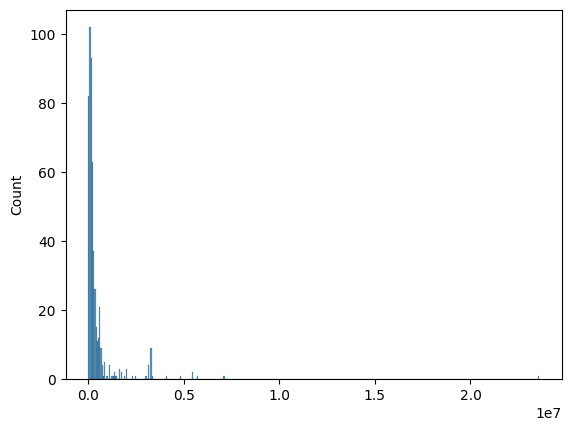

In [16]:
sns.histplot(pb)
plt.plot()

## Análise do preço contratual

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

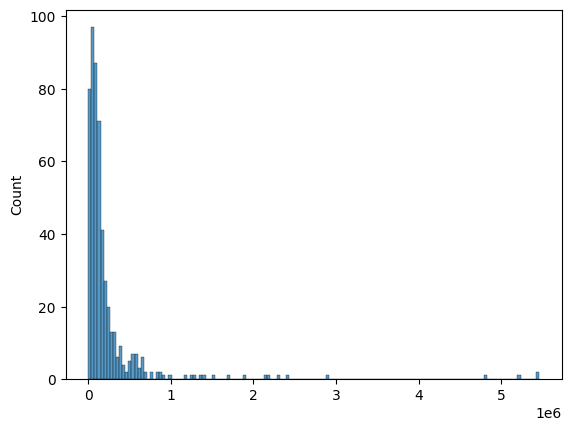

In [17]:
sns.histplot(pc)
plt.plot()

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

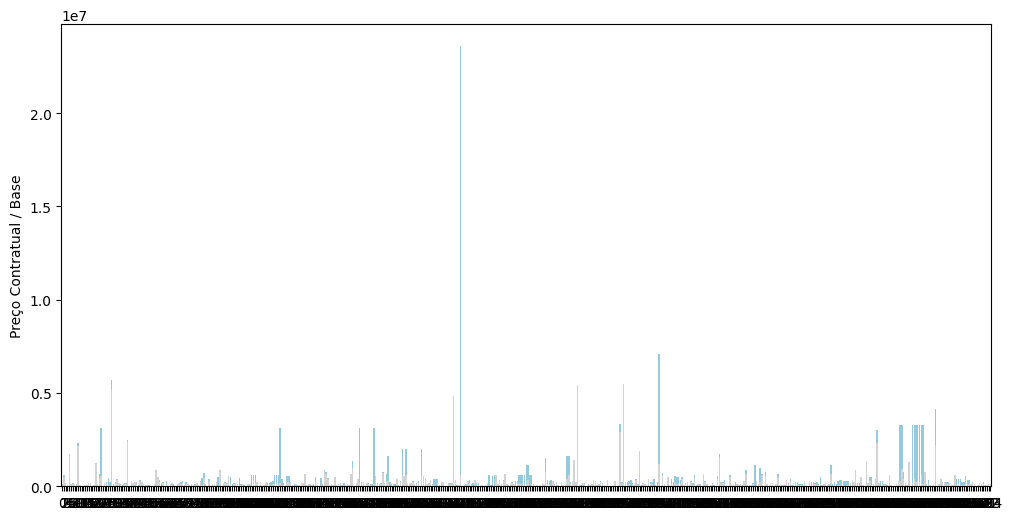

In [18]:
# Plot do Preço Base vs Preço Contratual para ver diferenças entre ambos para um mesmo contrato
df = contratos(cpub).iloc[:,[2,18]]
df = df.rename(columns={2: 'PrecoBase', 18:'PrecoContratual'})
df = df.astype('float')

plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.show()

/tmp/ipykernel_7518/84178919.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.boxplot(pb/pc)


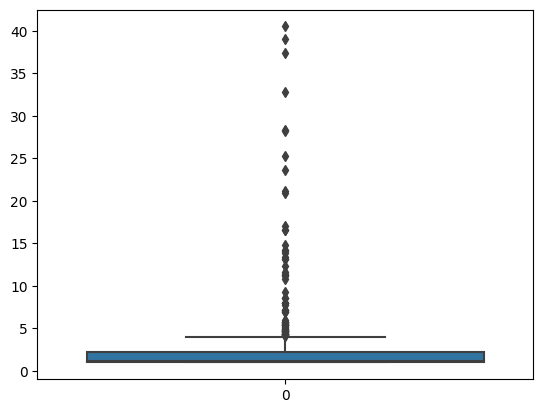

In [19]:
sns.boxplot(pb/pc)
plt.show()

/tmp/ipykernel_7518/3234519312.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.histplot(pb/pc)
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


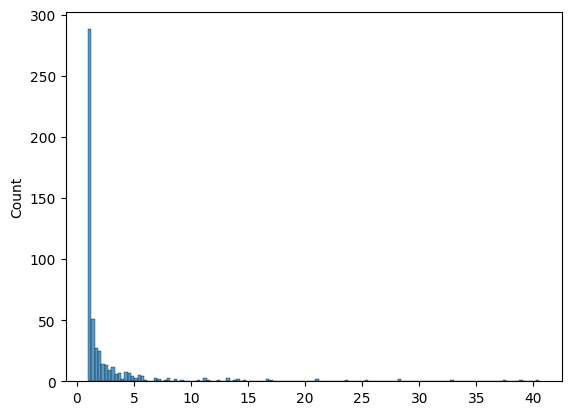

In [20]:
sns.histplot(pb/pc)
plt.show()

# 

In [21]:
# Índice com preço contratual nulo
np.where(pc == 0)

(array([56]),)

In [22]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

(np.round(pb/pc, 4))

/tmp/ipykernel_7518/2437271471.py:4: RuntimeWarning: divide by zero encountered in divide
  (np.round(pb/pc, 4))


array([ 1.213,  1.137,  0.998,  1.433,  1.023,  1.   ,  1.593,  1.099,
        1.   ,  1.068,  1.213,  1.257,  1.   ,  1.139,  1.169,  1.   ,
        1.   ,  1.056,  1.003,  1.   ,  1.167,  1.471,  5.629,  1.268,
        1.195,  3.248,  5.446,  2.607,  1.089,  3.358,  1.163,  1.111,
        1.009,  2.835,  1.112,  1.2  ,  1.16 ,  1.023,  1.179,  1.   ,
        1.151,  1.004,  1.05 , 32.779,  1.227,  1.051,  1.001,  1.   ,
        1.007,  5.324,  1.   ,  1.794,  1.009,  1.   ,  1.024,  1.482,
          inf,  1.311,  1.732,  4.152,  1.   ,  1.   ,  1.117, 13.114,
        1.242,  1.084,  1.004,  2.273,  1.736,  1.534,  1.472,  1.   ,
        1.   ,  1.221,  1.027,  1.462,  1.016,  1.465,  1.155,  5.214,
        1.629,  1.065,  1.622,  1.412,  1.   ,  1.013,  1.027,  1.01 ,
       13.813,  1.042,  1.006,  1.027,  1.006,  1.001,  1.   ,  3.603,
        5.773,  1.421,  1.   ,  1.108,  6.991,  1.815,  1.   ,  3.023,
        1.   ,  1.326,  1.121, 12.347,  1.885,  3.288,  1.   ,  4.39 ,
      

***

<br>

<br>

Verificar a situação em que o preco base é muito maior do que o preço contratual

1. pegar no maior valor do rácio pb/pc
2. verificar pb e pc e verificar rácio
4. obter id e verificar que bate certo usando o função contrato()
5. obter o número de anúncio
6. calcular o número de ocorrências do anúncio
7. obter id's para o mesmo número de anúncio
8. somar precos contratuais
9. comparar novamente com o preço base


**1.**

In [12]:
# Índice do contrato com maior rácio 
rat = pb/pc
rat5 = np.where(rat > 5)[0]

print(np.where(rat > 5), '\n\n', rat[np.where(rat > 5)])

print('\n\n\n Índice do maior rácio :', np.where(rat > 30)[0])

(array([ 22,  26,  43,  49,  56,  63,  79,  88,  96, 100, 107, 121, 122,
       123, 131, 133, 146, 168, 176, 184, 185, 211, 223, 225, 241, 243,
       244, 259, 260, 261, 262, 264, 321, 334, 337, 387, 391, 402, 441,
       442, 444, 457, 462, 473, 480, 481, 482, 483, 484, 485, 486, 505,
       526, 527, 528, 538, 556]),) 

 [ 5.62857143  5.44560487 32.77861826  5.32345324         inf 13.113612
  5.21416667 13.81261621  5.77337355  6.99106145 12.34693878  5.37510373
  7.9962963  20.90415648 39.         13.16450283  6.99106145 16.99761431
 25.29526627  5.73025754  7.77891492  9.29339942  5.05540753 40.50319712
 37.3603176  28.36080034 16.60769231  5.37510373 13.3822314   7.9962963
  8.59323596 16.60769231  8.61981982 11.17657423  6.04988514 11.60215953
 28.18757747  7.15674722  5.49249359  7.14285714  5.69908815 11.34965992
 14.23251799 10.7886068  21.12748845  8.02794226 14.10734763 11.32270847
 14.81830975  5.52102941 23.63159126  7.         25.68512721 10.20322963
  5.64238707  6.404

/tmp/ipykernel_12575/2939907773.py:2: RuntimeWarning: divide by zero encountered in divide
  rat = pb/pc


**2.**

In [13]:
i = 131
pb[i],pc[i], pb[i]/pc[i]

(138172.32, 3542.88, 39.0)

**3.**

In [14]:
j = (cpub[i])[0]

Cc = contrato(j)
Cc

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10230922,11771/2023,138172.32,15,False,6612945,13246654,2023-07-13,135,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700010896


**4**

In [15]:
n_anuncio = Cc.iloc[:,1][0]
n_anuncio

'11771/2023'

**5.**

In [16]:
np.where(cp.NrAnuncio == n_anuncio) 

(array([131, 156]),)

In [18]:
contrato(cpub[131])

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10230922,11771/2023,138172.32,15,False,6612945,13246654,2023-07-13,135,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700010896


In [20]:
contrato(cpub[156])

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10252068,11771/2023,138172.32,15,False,6612945,13246654,2023-07-13,135,2,...,None,None,False,None,True,None,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700039280
